<a href="https://colab.research.google.com/github/RenanCOliveira93/Machine_Learning/blob/main/Redes_Neurais_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação e Preparo dos Dados

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf

O conjunto de dados MNIST é um dos conjuntos de dados mais populares e amplamente utilizados para o treinamento e teste de algoritmos de aprendizado de máquina e visão computacional. Ele é composto por um conjunto de imagens de dígitos escritos à mão, que são amplamente utilizadas para o reconhecimento de dígitos manuscritos.

In [2]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [3]:
# Carregamento dos Dados
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Inspeção
print("Forma dos dados de treino: ", train_images.shape)
print("Forma dos dados de teste: ", test_images.shape)

Forma dos dados de treino:  (60000, 28, 28)
Forma dos dados de teste:  (10000, 28, 28)


In [4]:
# Normalização dos dados
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
# Remodelagem para adicionar o canal de cor
train_images = train_images.reshape((-1,28,28,1))
test_images = test_images.reshape((-1,28,28,1))

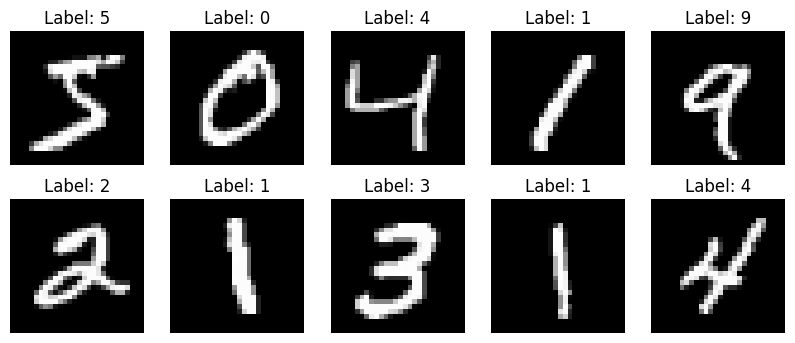

In [6]:
import matplotlib.pyplot as plt

# Função para plotar as imagens
def plot_images(images, labels, num_images):
    plt.figure(figsize=(10, 4))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()

# Plotar as primeiras 10 imagens do conjunto de treinamento
plot_images(train_images, train_labels, 10)

## Construção do Modelo com TensorFlow

In [7]:
model_tf = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
# Compilação d Modelo
model_tf.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [9]:
print(model_tf)

## Treinamento e Avaliação

In [10]:
# Treino
history_tf = model_tf.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Avaliação
test_loss, test_acc = model_tf.evaluate(test_images, test_labels)
print("Acurácia Tensorflow de: ", round(test_acc * 100,2))

Epoch 1/10
1500/1500 [==============================] - 43s 28ms/step - loss: 0.1738 - accuracy: 0.9487 - val_loss: 0.0678 - val_accuracy: 0.9797
Epoch 2/10
1500/1500 [==============================] - 31s 20ms/step - loss: 0.0570 - accuracy: 0.9823 - val_loss: 0.0596 - val_accuracy: 0.9819
Epoch 3/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0349 - accuracy: 0.9892 - val_loss: 0.0604 - val_accuracy: 0.9818
Epoch 4/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0236 - accuracy: 0.9931 - val_loss: 0.0587 - val_accuracy: 0.9843
Epoch 5/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0168 - accuracy: 0.9948 - val_loss: 0.0562 - val_accuracy: 0.9853
Epoch 6/10
1500/1500 [==============================] - 31s 20ms/step - loss: 0.0113 - accuracy: 0.9964 - val_loss: 0.0558 - val_accuracy: 0.9859
Epoch 7/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.0631 -

## Outras Métricas importantes

In [11]:
# Histórico de Treinamento do TensorFlow
acc_tf = history_tf.history['accuracy']
val_acc_tf = history_tf.history['val_accuracy']
loss_tf = history_tf.history['loss']
val_loss_tf = history_tf.history['val_loss']

print("Acurácia de Treinamento: ", round(acc_tf[-1]* 100,2))
print("Acurácia de Validação: ", round(val_acc_tf[-1]* 100,2))
print("Perda de Treinamento: ", round(loss_tf[-1]* 100,2))
print("Perda de Validação: ", round(val_loss_tf[-1]* 100,2))

Acurácia de Treinamento:  99.79
Acurácia de Validação:  98.53
Perda de Treinamento:  0.64
Perda de Validação:  6.71


## Análise Gráfica

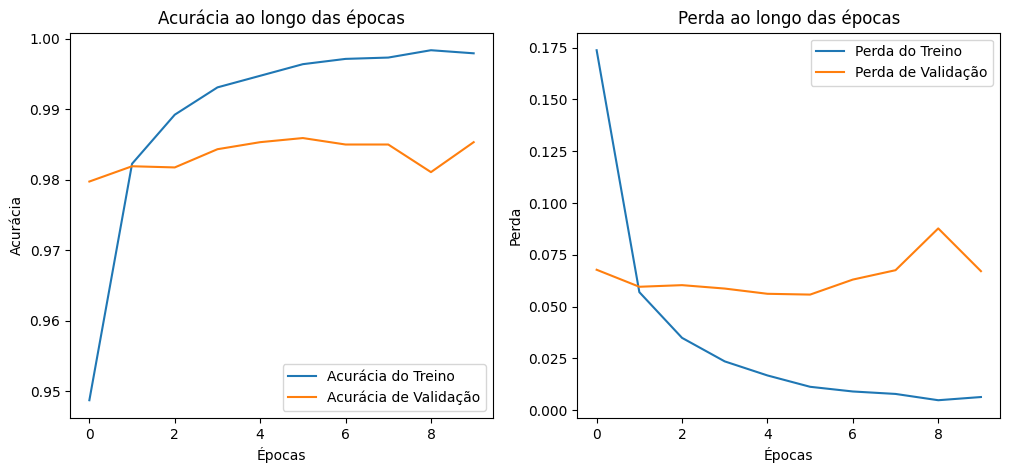

In [12]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history_tf.history['accuracy'], label='Acurácia do Treino')
plt.plot(history_tf.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Acurácia ao longo das épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1 ,2, 2)
plt.plot(history_tf.history['loss'], label='Perda do Treino')
plt.plot(history_tf.history['val_loss'], label='Perda de Validação')
plt.title('Perda ao longo das épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.show()

Plotando a Matriz de Confusão

313/313 [==============================] - 2s 5ms/step


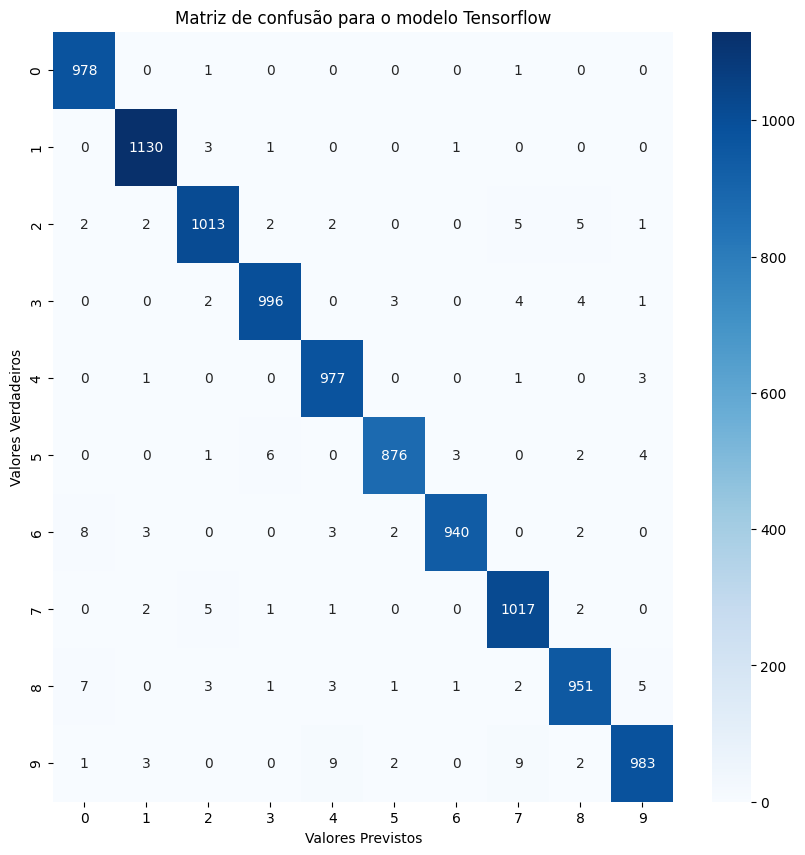

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Previsões com o Modelo Tensorflow
predictions_tf = model_tf.predict(test_images)
predicted_labels = np.argmax(predictions_tf, axis=1)

# Matriz
conf_matrix_tf = confusion_matrix(test_labels, predicted_labels)

# Visualizar o Plot com Seaborn
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix_tf, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Verdadeiros')
plt.title("Matriz de confusão para o modelo Tensorflow")
plt.show()